#📌 Extracão

In [11]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import plotly.express as px

#Importando os dados via API
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
resposta = requests.get(url)
dados_resposta = resposta.json()
df_raw = pd.json_normalize(dados_resposta)

#🔧 Transformação

In [ ]:
# Verificando valores únicos de cada coluna
for col in df_raw.columns:
  print(f'Valores únicos da coluna {col}: {df_raw[col].nunique()}')
  if df_raw[col].nunique() < 50:
    print(df_raw[col].unique())
    print('-' * 50)

In [ ]:
#Verificando valores nulos
nulos = df_raw.isnull().values.sum()
print(nulos)
print('-' * 50)
#Verificando valores duplicados
duplicados = df_raw.duplicated().sum()
print(duplicados)
print('-' * 50)
#Verificando valores vazios
vazios = df_raw.apply(lambda x: x.astype(str).str.strip() == '').sum()
print(vazios[vazios > 0])
print('-' * 50)

In [ ]:
#Verificando erros de formatação
df_raw.info()

In [ ]:
#Verificando inconsistências nas categorias
df_raw.describe(include='all')

In [3]:
#Backup antes do tratamento dos dados
df_copy = df_raw.copy()

In [4]:
#Convertendo total para valor numérico
df_copy['account.Charges.Total']  = pd.to_numeric(df_copy['account.Charges.Total'], errors='coerce')

In [5]:
#Eliminando linhas com valor Nulo da coluna total
df_copy.dropna(subset=['account.Charges.Total'], inplace=True)
print(df_copy['account.Charges.Total'].isnull().values.sum())

0


In [6]:
#Eliminando linhas com churn
df_copy = df_copy[df_copy['Churn'].str.strip() != '']
print(len(df_copy))

7032


In [ ]:
#Dados tratados
df_copy.apply(lambda x: x.astype(str).str.strip() == '').sum()

In [7]:
#Padronizando nomes das tabelas
df_copy.columns = df_copy.columns.str.lower().str.replace('.','_')
df_copy.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [8]:
#Criando a coluna contas_diarias
df_copy['contas_diarias'] = ((df_copy['account_charges_total'] / df_copy['customer_tenure']) / 30 ).round(2)
df_copy.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,contas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.20
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.01
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.34
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.17
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.97


In [9]:
#Converter colunas textuais sim e nao para 0 e 1
colunas_a_converter = ['churn','customer_partner','customer_dependents','phone_phoneservice','phone_multiplelines','internet_onlinebackup','internet_deviceprotection','internet_techsupport','internet_streamingtv','internet_streamingmovies','account_paperlessbilling']
df_copy[colunas_a_converter] = df_copy[colunas_a_converter].apply(lambda x : x.map({'Yes': 1,'No': 0}))

#📊 Carga e análise

In [ ]:
#Analise descritiva
df_copy.describe(include='all')

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,contas_diarias
count,7032,7032.000000,7032,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,6352.000000,7032,...,5512.000000,5512.000000,5512.000000,5512.000000,7032,7032.000000,7032,7032.000000,7032.000000,7032.000000
unique,7032,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,3,...,NaN,NaN,NaN,NaN,3,NaN,4,NaN,NaN,NaN
top,9995-HOTOH,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,Fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,NaN,NaN,NaN
freq,1,NaN,3549,NaN,NaN,NaN,NaN,NaN,NaN,3096,...,NaN,NaN,NaN,NaN,3875,NaN,2365,NaN,NaN,NaN
mean,NaN,0.265785,NaN,0.162400,0.482509,0.298493,32.421786,0.903299,0.467097,NaN,...,0.438679,0.370102,0.490385,0.495464,NaN,0.592719,NaN,64.798208,2283.300441,2.159879
std,NaN,0.441782,NaN,0.368844,0.499729,0.457629,24.545260,0.295571,0.498955,NaN,...,0.496271,0.482875,0.499953,0.500025,NaN,0.491363,NaN,30.085974,2266.771362,1.006217
min,NaN,0.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,18.250000,18.800000,0.460000
25%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,35.587500,401.450000,1.207500
50%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,70.350000,1397.475000,2.350000
75%,NaN,1.000000,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,89.862500,3794.737500,3.010000


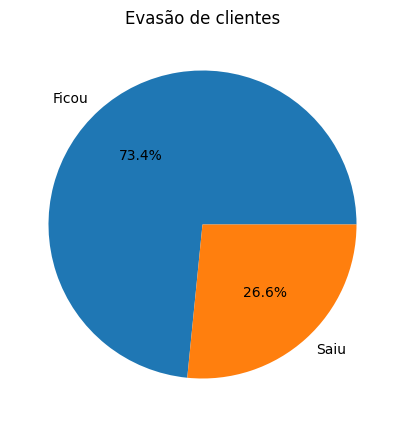

In [ ]:
#Grafico representando a variável churn
df_churn = df_copy['churn']
plt.figure(figsize=(10,5))
plt.title('Evasão de clientes')
plt.pie(df_churn.value_counts(),labels=['Ficou','Saiu'],autopct='%1.1f%%')
plt.show()


Text(0, 0.5, 'Quantidade')

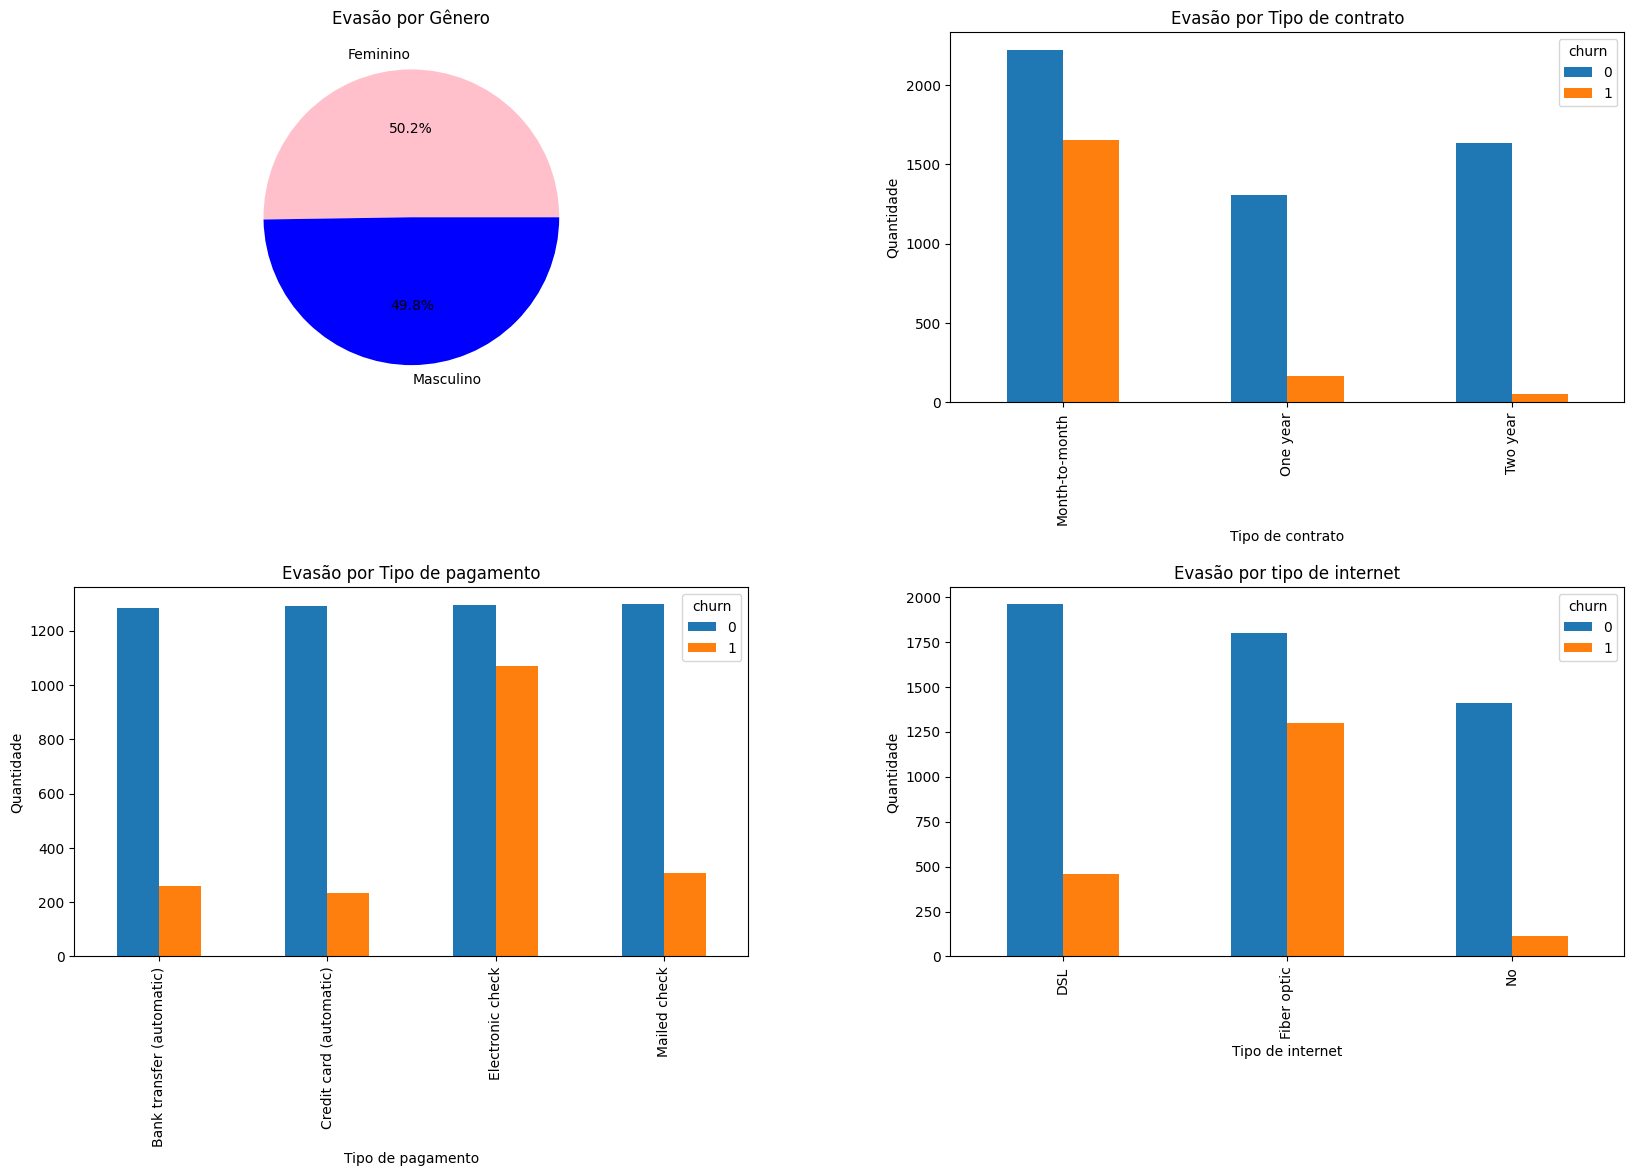

In [10]:
# Variáveis categóricas
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

#Gênero
df_genero_grouped = df_copy.groupby(['customer_gender','churn']).size().reset_index(name='quantidade')
df_genero = df_genero_grouped[df_genero_grouped['churn'] == 1.00]
axs[0,0].pie(df_genero['quantidade'],labels=['Feminino','Masculino'],autopct='%1.1f%%',colors=['pink','blue'])
axs[0,0].set_title('Evasão por Gênero')

#Tipo de contrato
df_contrato_grouped = df_copy.groupby(['account_contract','churn']).size().unstack(fill_value=0)
df_contrato_grouped.plot(kind='bar', ax=axs[0,1], stacked=False)
axs[0,1].set_title('Evasão por Tipo de contrato')
axs[0,1].set_xlabel('Tipo de contrato')
axs[0,1].set_ylabel('Quantidade')

#Método de pagamento
df_meio_de_pagamento_grouped = df_copy.groupby(['account_paymentmethod','churn']).size().unstack(fill_value=0)
df_meio_de_pagamento_grouped.plot(kind='bar', ax=axs[1,0], stacked=False)
axs[1,0].set_title('Evasão por Tipo de pagamento')
axs[1,0].set_xlabel('Tipo de pagamento')
axs[1,0].set_ylabel('Quantidade')

#Tipo de internet
df_tipo_internet_grouped = df_copy.groupby(['internet_internetservice','churn']).size().unstack(fill_value=0)
df_tipo_internet_grouped.plot(kind='bar', ax=axs[1,1], stacked=False)
axs[1,1].set_title('Evasão por tipo de internet')
axs[1,1].set_xlabel('Tipo de internet')
axs[1,1].set_ylabel('Quantidade')


In [16]:
#Variaveis numéricas
# Churn por tempo de contrato
px.histogram(df_copy, x='customer_tenure', color='churn', barmode='group', title='Evasão por tempo de contrato')

In [15]:
# Total gasto
px.histogram(df_copy, x='account_charges_total', color='churn', barmode='group', title='Evasão por total gasto')

In [14]:
# Churn por pagamento mensal
px.histogram(df_copy, x='account_charges_monthly', color='churn', barmode='group', title='Evasão por pagamento mensal')

#📄Relatorio Final

## Introdução
O presente relatório tem como principal objetivo analisar o alto índice de cancelamentos da empresa Telecom X. Para isso, foram consolidados e examinados os dados brutos referentes à adesão de clientes. As seções a seguir detalham os resultados encontrados e os principais fatores observados.

## Limpeza dos dados
A primeira etapa foi a limpeza de dados onde foram feitas as seguintes alterações:
* Exclusão de 224 valores vazios ("") na coluna "churn".
* Exclusão de 11 valores vazios ("") na coluna "account_charges_total"
* Conversão da coluna "account.Charges.Total" de string para numérico.

## Análise exploratória
Durante a análise exploratória foram identificados os seguintes fatores que mais impactavam na evasão do cliente, sendo eles:
* Senioridade: Clientes com mais de 65 anos possuem taxa de evasão maior que a média.
* Tempo de contrato: Clientes com menor contrato possuem maior tendência a evasão.
* Serviço de internet: Clientes com Fibra ótica possuem maior taxa de evasão.
* Tipo de contrato: Cobrança mensal apresenta uma maior evasão que a média.
* Método de pagamento: Cobrança eletrônica com maior taxa de evasão.
* Gasto mensal: Clientes com gasto mensal elevado tendem a evadir mais.
* Gasto total: Clientes com menor gasto possuem maior taxa de evasão.



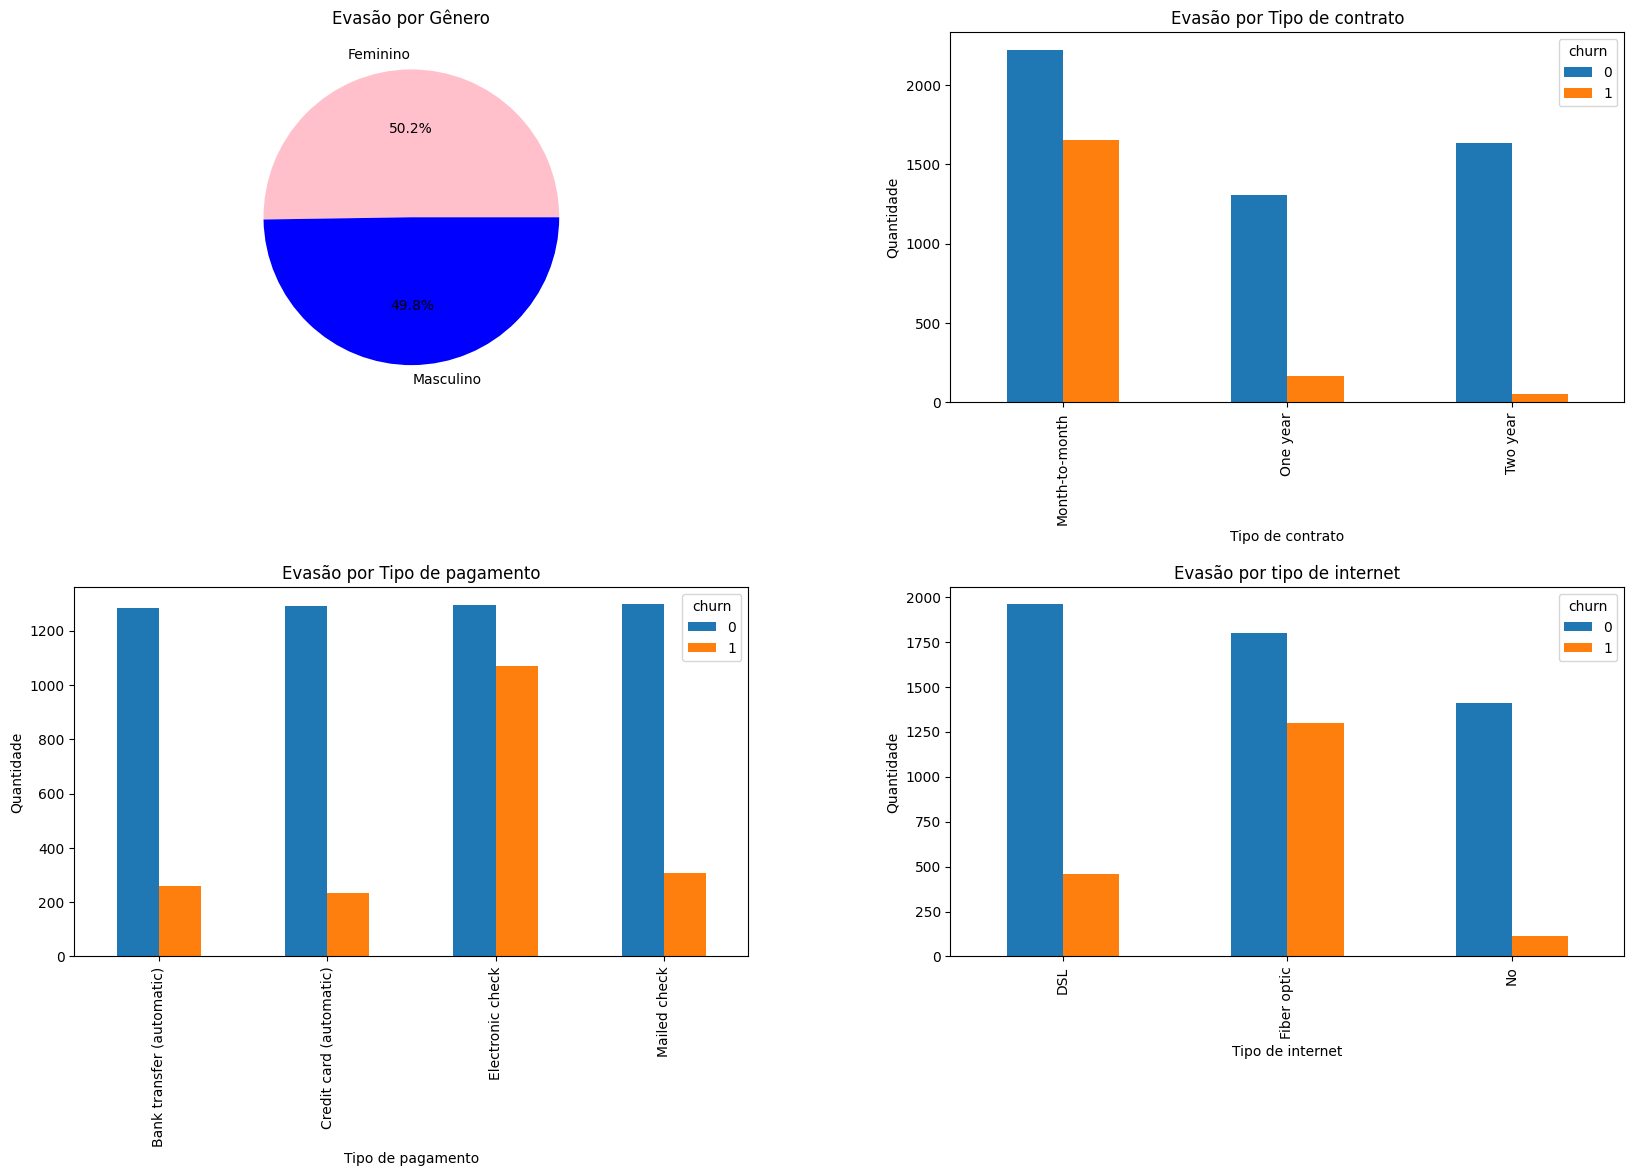

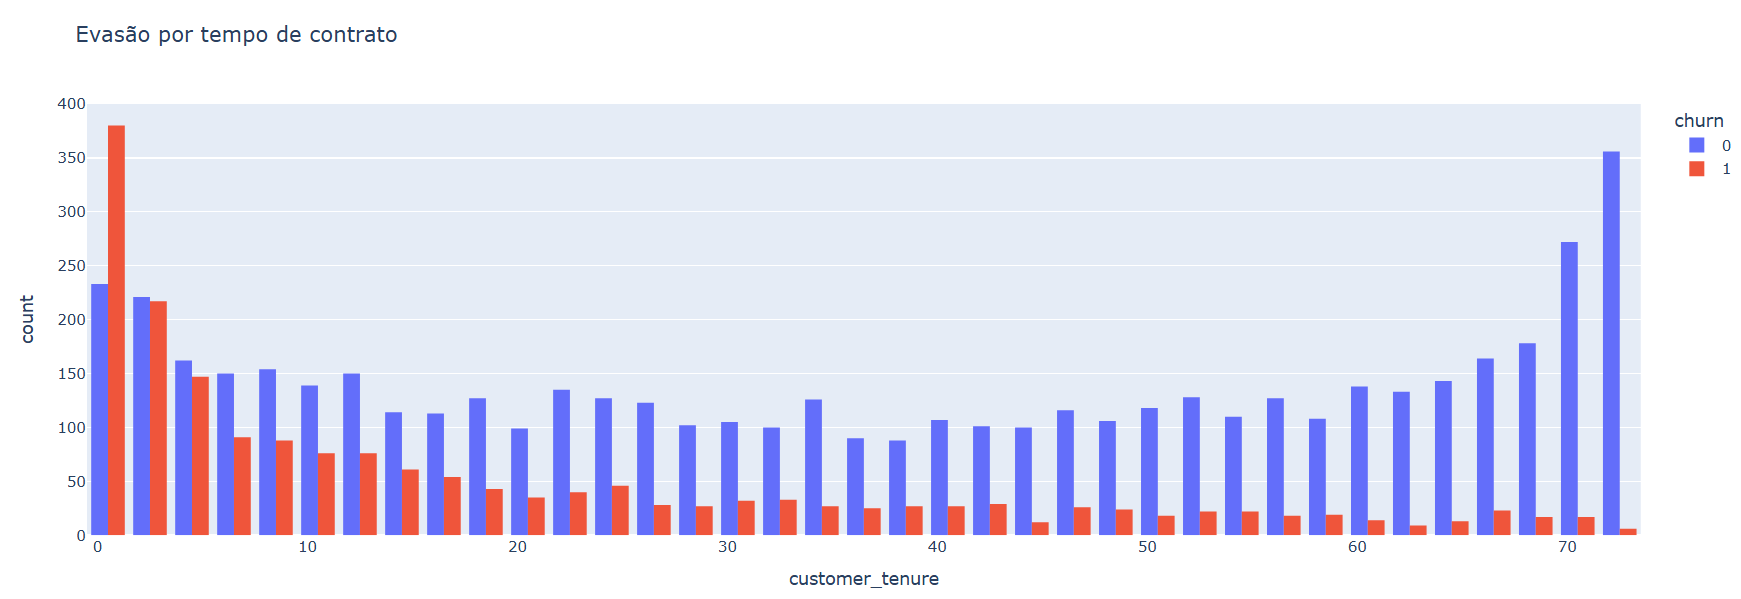

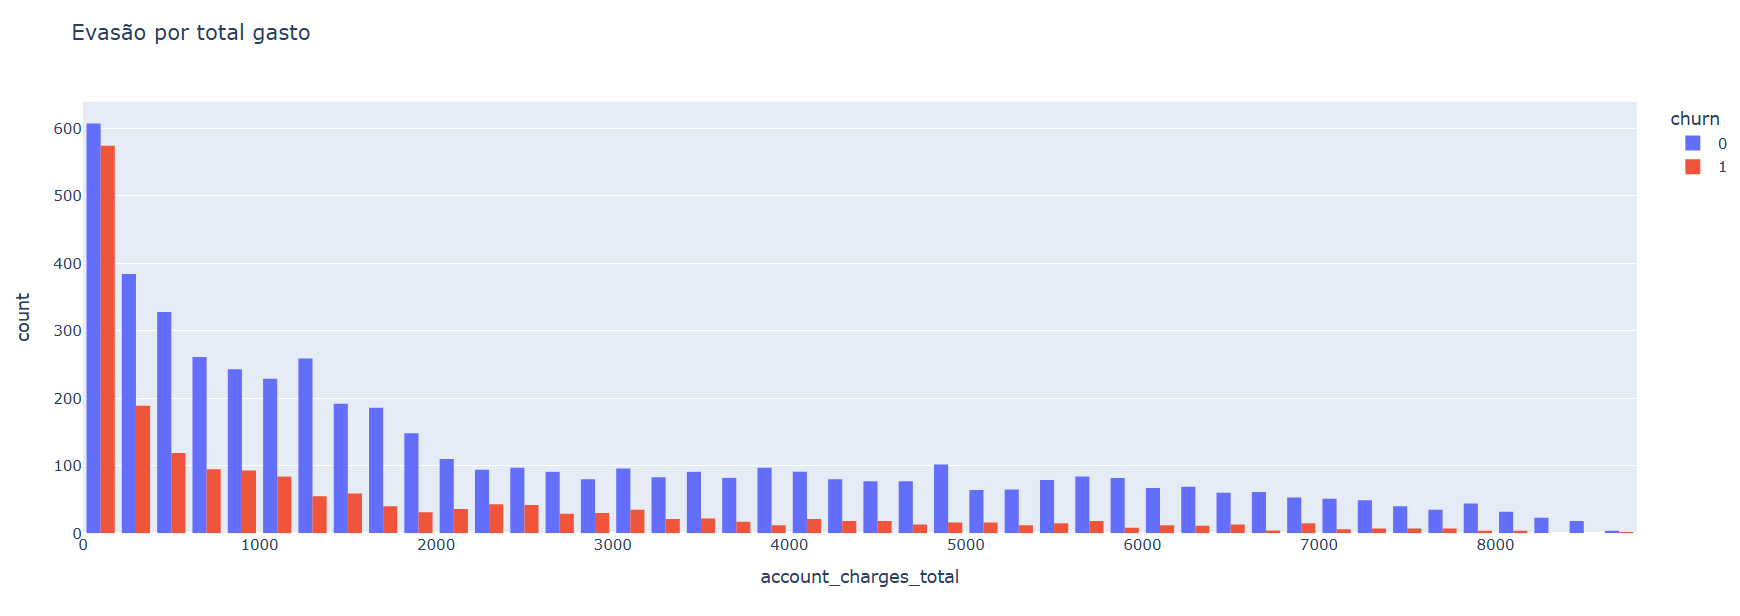

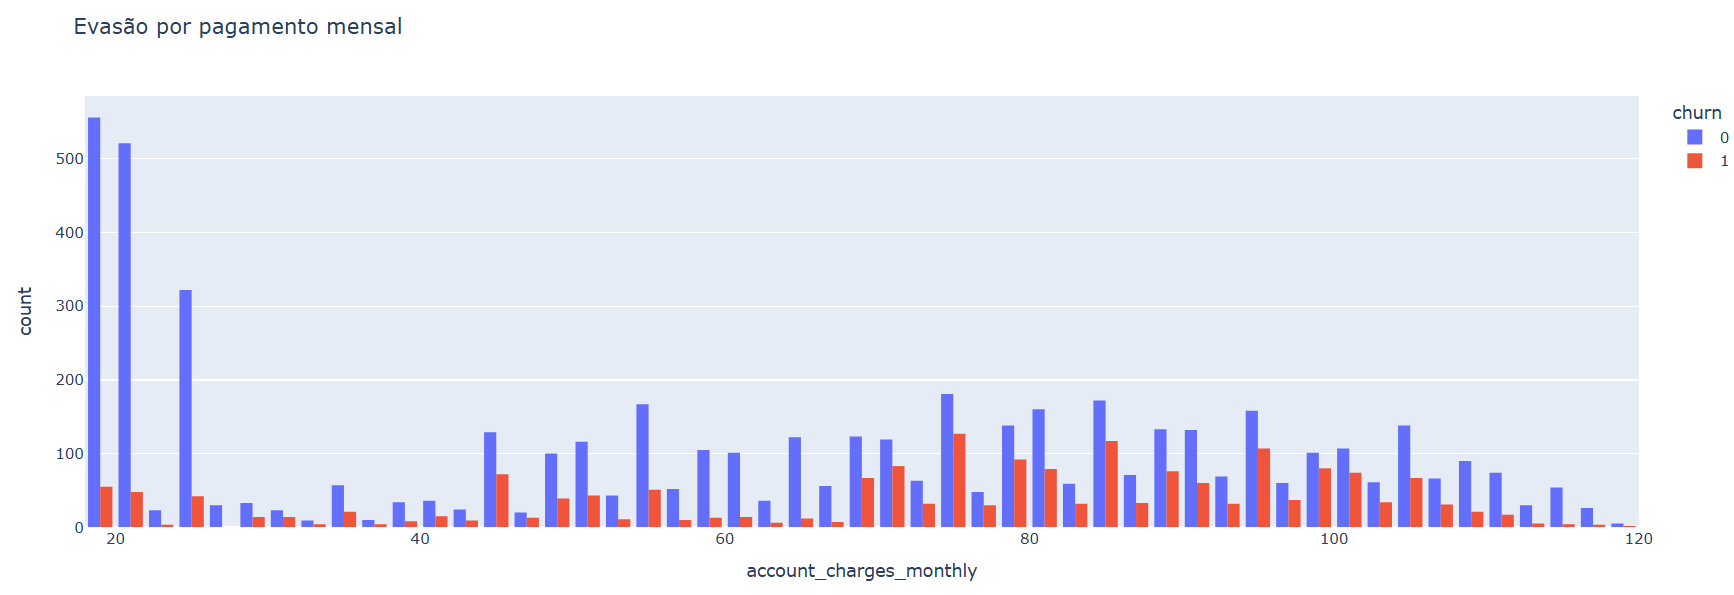

## Recomendações

Com base nos fatores de risco identificados, sugerem-se as seguintes ações estratégicas:

1. Contratos e Fidelização
* Incentivar contratos de longo prazo: Oferecer descontos e benefícios (ex: upgrade de serviço) para clientes que migrarem de planos mensais para anuais ou bianuais.

* Criar programa de fidelidade inicial: Recompensar clientes nos primeiros meses para demonstrar valor rapidamente e reduzir o churn de novos contratos.

2. Serviço de Fibra Ótica
* Investigar causa da evasão: Realizar pesquisas de satisfação focadas em clientes de fibra para entender se o problema é preço, qualidade da instalação ou instabilidade do serviço.

* Revisar competitividade: Analisar e ajustar os preços dos pacotes de fibra em relação à concorrência para melhorar a percepção de custo-benefício.

3. Ações por Segmento de Cliente
Clientes Sênior (+65 anos):

* Desenvolver planos simplificados e com preços diretos.

* Oferecer atendimento humanizado e prioritário para este público.

4. Clientes com Alto Gasto Mensal:

* Implementar gestão de contas proativa para garantir a satisfação e otimizar pacotes.

* Oferecer benefícios e reconhecimentos exclusivos para este segmento.

5. Processos de Pagamento
* Incentivar migração de método de pagamento: Oferecer um desconto único para clientes que trocarem a "Cobrança Eletrônica" por débito automático ou cartão de crédito, métodos com menor taxa de churn.
